In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set(style='whitegrid')

Exploratory Data Analysis (EDA)



In [5]:
# Load the three datasets
features_df = pd.read_csv('Features data set.csv')
sales_df = pd.read_csv('sales data-set.csv')
stores_df = pd.read_csv('stores data-set.csv')

In [6]:
# Check out the Features data
print("Features Data Set:")
print(features_df.head())  # First 5 rows

print("\nShape:", features_df.shape)  # Rows and columns
print("\nData Types:\n", features_df.dtypes)  # What’s each column made of?

# How many unique stores, dates, and holidays?
print("\nUnique Stores:", features_df['Store'].nunique())
print("Unique Dates:", features_df['Date'].nunique())
print("Holiday Breakdown:\n", features_df['IsHoliday'].value_counts())

Features Data Set:
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  

Shape: (8190, 12)

Data Types:
 Store             int64
Date             object
Temperature     float64
Fuel_

In [7]:
# Check out the Sales data
print("\nSales Data Set:")
print(sales_df.head())

print("\nShape:", sales_df.shape)
print("\nData Types:\n", sales_df.dtypes)

print("\nUnique Stores:", sales_df['Store'].nunique())
print("Unique Departments:", sales_df['Dept'].nunique())
print("Unique Dates:", sales_df['Date'].nunique())
print("Holiday Breakdown:\n", sales_df['IsHoliday'].value_counts())


Sales Data Set:
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False

Shape: (421570, 5)

Data Types:
 Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

Unique Stores: 45
Unique Departments: 81
Unique Dates: 143
Holiday Breakdown:
 IsHoliday
False    391909
True      29661
Name: count, dtype: int64


In [9]:
# Check out the Stores data
print("\nStores Data Set:")
print(stores_df.head())

print("\nShape:", stores_df.shape)
print("\nData Types:\n", stores_df.dtypes)

print("\nUnique Stores:", stores_df['Store'].nunique())
print("Store Type Breakdown:\n", stores_df['Type'].value_counts())


Stores Data Set:
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

Shape: (45, 3)

Data Types:
 Store     int64
Type     object
Size      int64
dtype: object

Unique Stores: 45
Store Type Breakdown:
 Type
A    22
B    17
C     6
Name: count, dtype: int64


In [10]:
# Quick function to show missing values
def show_missing(df, name):
    missing = df.isnull().sum()
    percent = (missing / len(df)) * 100
    print(f"\nMissing Values in {name}:\n", pd.DataFrame({'Missing': missing, 'Percent': percent}))

# Run it for all datasets
show_missing(features_df, "Features Data Set")
show_missing(sales_df, "Sales Data Set")
show_missing(stores_df, "Stores Data Set")


Missing Values in Features Data Set:
               Missing    Percent
Store               0   0.000000
Date                0   0.000000
Temperature         0   0.000000
Fuel_Price          0   0.000000
MarkDown1        4158  50.769231
MarkDown2        5269  64.334554
MarkDown3        4577  55.885226
MarkDown4        4726  57.704518
MarkDown5        4140  50.549451
CPI               585   7.142857
Unemployment      585   7.142857
IsHoliday           0   0.000000

Missing Values in Sales Data Set:
               Missing  Percent
Store               0      0.0
Dept                0      0.0
Date                0      0.0
Weekly_Sales        0      0.0
IsHoliday           0      0.0

Missing Values in Stores Data Set:
        Missing  Percent
Store        0      0.0
Type         0      0.0
Size         0      0.0


In [11]:
# Stats for numerical columns
print("\nFeatures Stats:\n", features_df.describe())
print("\nSales Stats:\n", sales_df.describe())
print("\nStores Stats:\n", stores_df.describe())


Features Stats:
              Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462208   6792.329861   13086

In [12]:
# How many of each store type?
print("\nStore Type Counts:\n", stores_df['Type'].value_counts())

# Top 10 departments in sales
print("\nTop 10 Departments:\n", sales_df['Dept'].value_counts().head(10))


Store Type Counts:
 Type
A    22
B    17
C     6
Name: count, dtype: int64

Top 10 Departments:
 Dept
1     6435
2     6435
3     6435
4     6435
7     6435
8     6435
16    6435
13    6435
10    6435
14    6435
Name: count, dtype: int64



Features Dates: 2010-02-05 00:00:00 to 2013-07-26 00:00:00
Sales Dates: 2010-02-05 00:00:00 to 2012-10-26 00:00:00


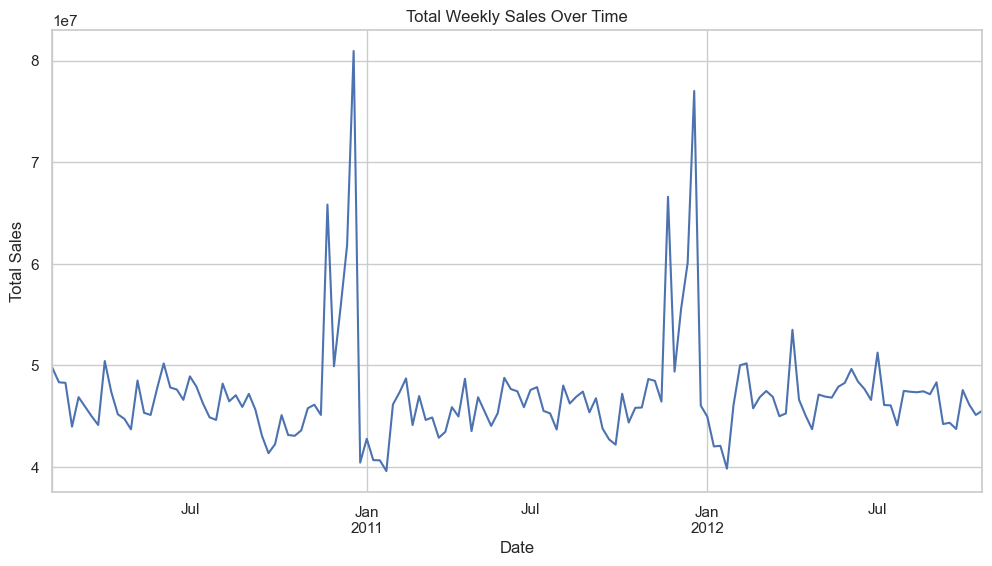

In [13]:
# Turn Date into something we can work with
features_df['Date'] = pd.to_datetime(features_df['Date'], format='%d/%m/%Y')
sales_df['Date'] = pd.to_datetime(sales_df['Date'], format='%d/%m/%Y')

# What’s the date range?
print("\nFeatures Dates:", features_df['Date'].min(), "to", features_df['Date'].max())
print("Sales Dates:", sales_df['Date'].min(), "to", sales_df['Date'].max())

# Total sales over time
sales_by_date = sales_df.groupby('Date')['Weekly_Sales'].sum()
plt.figure(figsize=(12, 6))
sales_by_date.plot()
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


Missing Values in Merged Data Set:
               Missing    Percent
Store               0   0.000000
Dept                0   0.000000
Date                0   0.000000
Weekly_Sales        0   0.000000
IsHoliday           0   0.000000
Temperature         0   0.000000
Fuel_Price          0   0.000000
MarkDown1      270889  64.257181
MarkDown2      310322  73.611025
MarkDown3      284479  67.480845
MarkDown4      286603  67.984676
MarkDown5      270138  64.079038
CPI                 0   0.000000
Unemployment        0   0.000000
Type                0   0.000000
Size                0   0.000000


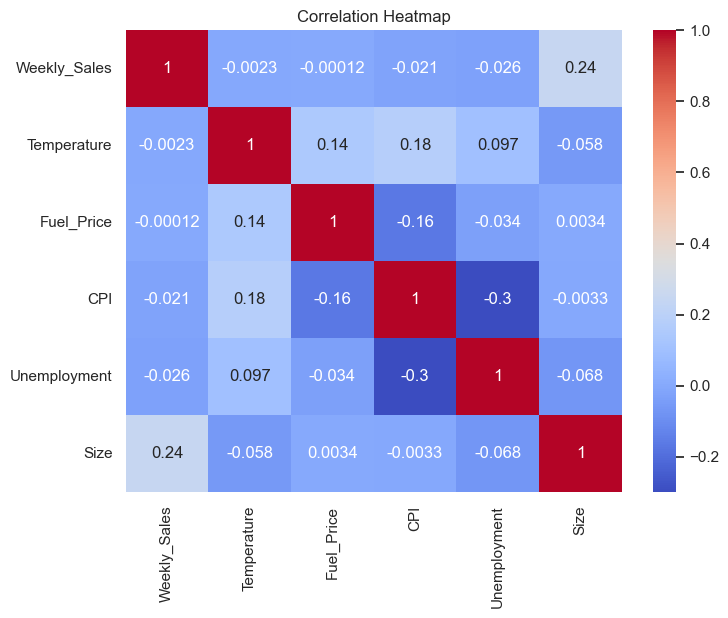

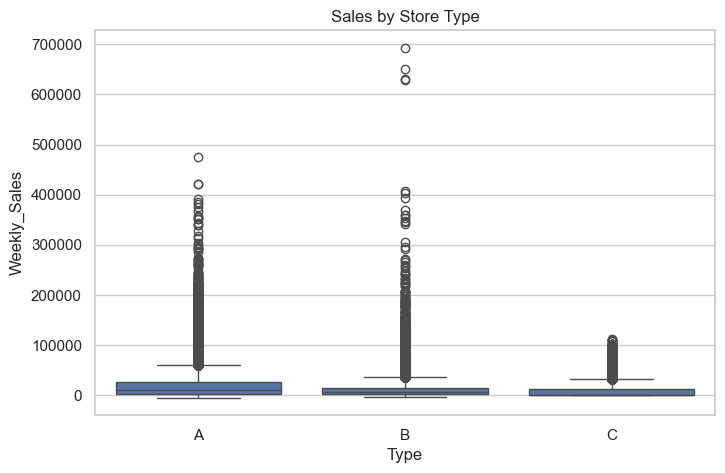

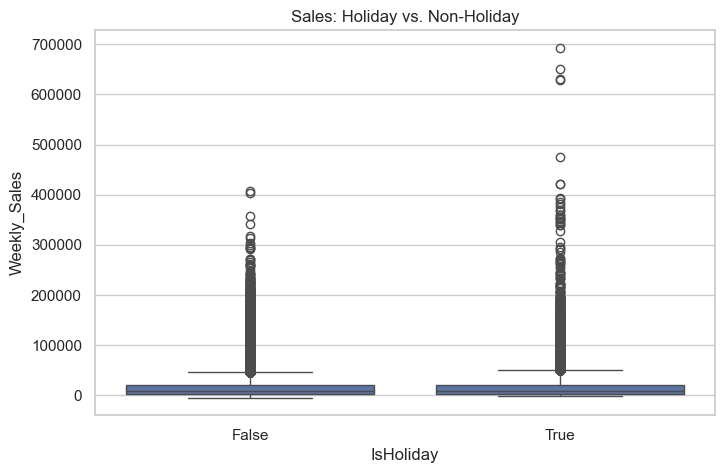

In [14]:
# Combine sales and features
merged_df = pd.merge(sales_df, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')

# Add stores data
final_df = pd.merge(merged_df, stores_df, on='Store', how='left')

# Check missing stuff again
show_missing(final_df, "Merged Data Set")

# Correlation heatmap
corr = final_df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Sales by store type
plt.figure(figsize=(8, 5))
sns.boxplot(x='Type', y='Weekly_Sales', data=final_df)
plt.title('Sales by Store Type')
plt.show()

# Sales: holiday vs. no holiday
plt.figure(figsize=(8, 5))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=final_df)
plt.title('Sales: Holiday vs. Non-Holiday')
plt.show()

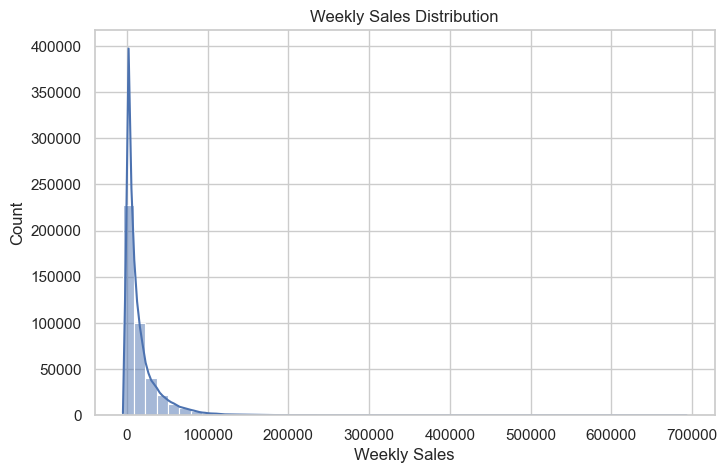

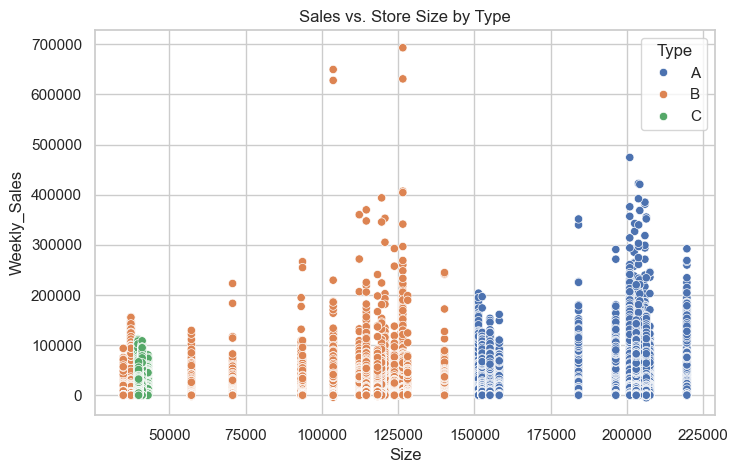

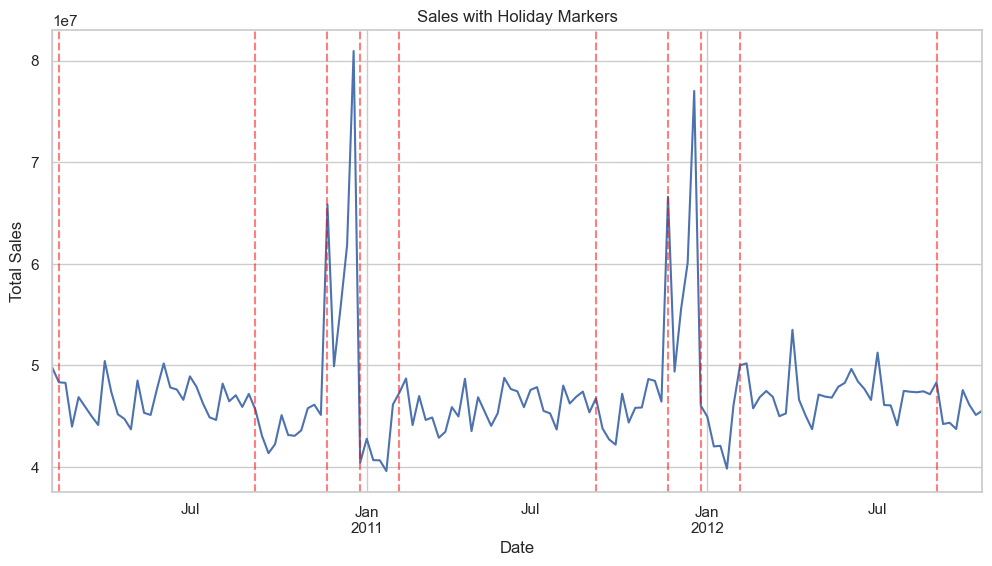

In [15]:
# How’s Weekly_Sales spread out?
plt.figure(figsize=(8, 5))
sns.histplot(final_df['Weekly_Sales'], bins=50, kde=True)
plt.title('Weekly Sales Distribution')
plt.xlabel('Weekly Sales')
plt.show()

# Sales vs. store size, colored by type
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Size', y='Weekly_Sales', data=final_df, hue='Type')
plt.title('Sales vs. Store Size by Type')
plt.show()

# Sales over time with holiday lines
holidays = final_df[final_df['IsHoliday'] == True]['Date'].unique()
plt.figure(figsize=(12, 6))
sales_by_date.plot()
for holiday in holidays:
    plt.axvline(holiday, color='red', linestyle='--', alpha=0.5)
plt.title('Sales with Holiday Markers')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

Data Preprocessing



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

sns.set_style("whitegrid")

In [19]:
# Load the datasets
features_df = pd.read_csv('Features data set.csv')
sales_df = pd.read_csv('sales data-set.csv')
stores_df = pd.read_csv('stores data-set.csv')

# Merge sales and features on Store, Date, and IsHoliday
merged_df = pd.merge(sales_df, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')

# Merge with stores on Store
final_df = pd.merge(merged_df, stores_df, on='Store', how='left')

# Check the shape and first few rows
print("Merged Data Shape:", final_df.shape)
print("\nFirst 5 Rows:\n", final_df.head())

Merged Data Shape: (421570, 16)

First 5 Rows:
    Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1  05/02/2010      24924.50      False        42.31       2.572   
1      1     1  12/02/2010      46039.49       True        38.51       2.548   
2      1     1  19/02/2010      41595.55      False        39.93       2.514   
3      1     1  26/02/2010      19403.54      False        46.63       2.561   
4      1     1  05/03/2010      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment Type    Size  
0      

In [20]:
# Check missing values
def show_missing(df, name):
    missing = df.isnull().sum()
    percent = (missing / len(df)) * 100
    print(f"\nMissing Values in {name}:\n", pd.DataFrame({'Missing': missing, 'Percent': percent}))

show_missing(final_df, "Merged Data Set")

# Replace NaN in MarkDown columns with 0
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
final_df[markdown_cols] = final_df[markdown_cols].fillna(0)

# Impute CPI and Unemployment with median
final_df['CPI'] = final_df['CPI'].fillna(final_df['CPI'].median())
final_df['Unemployment'] = final_df['Unemployment'].fillna(final_df['Unemployment'].median())

# Verify no missing values remain
show_missing(final_df, "After Imputation")


Missing Values in Merged Data Set:
               Missing    Percent
Store               0   0.000000
Dept                0   0.000000
Date                0   0.000000
Weekly_Sales        0   0.000000
IsHoliday           0   0.000000
Temperature         0   0.000000
Fuel_Price          0   0.000000
MarkDown1      270889  64.257181
MarkDown2      310322  73.611025
MarkDown3      284479  67.480845
MarkDown4      286603  67.984676
MarkDown5      270138  64.079038
CPI                 0   0.000000
Unemployment        0   0.000000
Type                0   0.000000
Size                0   0.000000

Missing Values in After Imputation:
               Missing  Percent
Store               0      0.0
Dept                0      0.0
Date                0      0.0
Weekly_Sales        0      0.0
IsHoliday           0      0.0
Temperature         0      0.0
Fuel_Price          0      0.0
MarkDown1           0      0.0
MarkDown2           0      0.0
MarkDown3           0      0.0
MarkDown4           0  

In [21]:
# Convert Date to datetime
final_df['Date'] = pd.to_datetime(final_df['Date'], format='%d/%m/%Y')

# Verify conversion
print("\nDate Column Type:", final_df['Date'].dtype)
print("Date Range:", final_df['Date'].min(), "to", final_df['Date'].max())


Date Column Type: datetime64[ns]
Date Range: 2010-02-05 00:00:00 to 2012-10-26 00:00:00


In [22]:
# Convert IsHoliday to 1/0
final_df['IsHoliday'] = final_df['IsHoliday'].map({True: 1, False: 0})

# Label encode Type
le = LabelEncoder()
final_df['Type'] = le.fit_transform(final_df['Type'])

# Check encoded values
print("\nIsHoliday Values:\n", final_df['IsHoliday'].value_counts())
print("\nType Values (Encoded):\n", final_df['Type'].value_counts())
print("Type Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


IsHoliday Values:
 IsHoliday
0    391909
1     29661
Name: count, dtype: int64

Type Values (Encoded):
 Type
0    215478
1    163495
2     42597
Name: count, dtype: int64
Type Mapping: {'A': np.int64(0), 'B': np.int64(1), 'C': np.int64(2)}


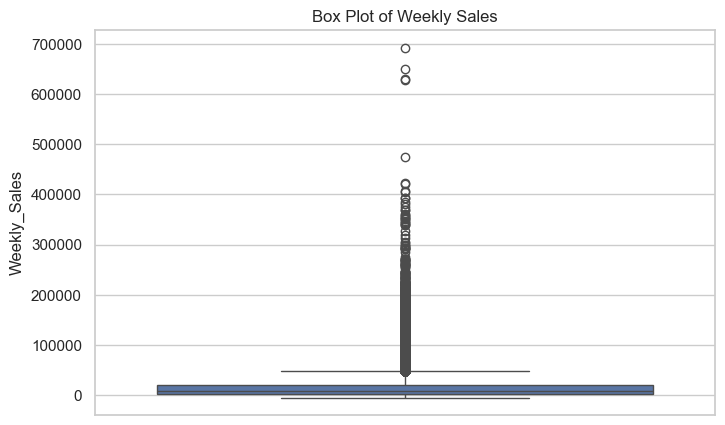

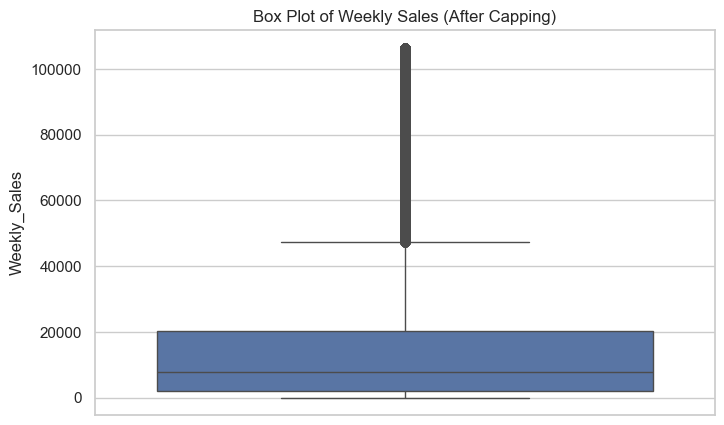

In [23]:
# Box plot for Weekly_Sales
plt.figure(figsize=(8, 5))
sns.boxplot(y=final_df['Weekly_Sales'])
plt.title('Box Plot of Weekly Sales')
plt.show()

# Cap Weekly_Sales at 1st and 99th percentiles
lower_cap = final_df['Weekly_Sales'].quantile(0.01)
upper_cap = final_df['Weekly_Sales'].quantile(0.99)
final_df['Weekly_Sales'] = final_df['Weekly_Sales'].clip(lower=lower_cap, upper=upper_cap)

# Verify with another box plot
plt.figure(figsize=(8, 5))
sns.boxplot(y=final_df['Weekly_Sales'])
plt.title('Box Plot of Weekly Sales (After Capping)')
plt.show()

In [24]:
# Check data types and missing values
print("\nFinal Data Types:\n", final_df.dtypes)
show_missing(final_df, "Final Data Set")

# Summary stats
print("\nFinal Data Summary:\n", final_df.describe())

# Save the cleaned dataset (optional)
final_df.to_csv('cleaned_retail_data.csv', index=False)
print("\nCleaned data saved as 'cleaned_retail_data.csv'")


Final Data Types:
 Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                     int64
Size                     int64
dtype: object

Missing Values in Final Data Set:
               Missing  Percent
Store               0      0.0
Dept                0      0.0
Date                0      0.0
Weekly_Sales        0      0.0
IsHoliday           0      0.0
Temperature         0      0.0
Fuel_Price          0      0.0
MarkDown1           0      0.0
MarkDown2           0      0.0
MarkDown3           0      0.0
MarkDown4           0      0.0
MarkDown5           0      0.0
CPI                 0      0.0


Feature Engineering



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

# Set plot style for consistency
sns.set_style("whitegrid")

In [2]:
# Load the cleaned dataset
try:
    df = pd.read_csv('cleaned_retail_data.csv')
    df['Date'] = pd.to_datetime(df['Date'])  # Ensure Date is datetime
    print("Loaded cleaned_retail_data.csv")
except FileNotFoundError:
    # If not saved, reload and merge original datasets
    features_df = pd.read_csv('Features data set.csv')
    sales_df = pd.read_csv('sales data-set.csv')
    stores_df = pd.read_csv('stores data-set.csv')
    merged_df = pd.merge(sales_df, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')
    df = pd.merge(merged_df, stores_df, on='Store', how='left')
    # Quick preprocessing
    markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
    df[markdown_cols] = df[markdown_cols].fillna(0)
    df['CPI'] = df['CPI'].fillna(df['CPI'].median())
    df['Unemployment'] = df['Unemployment'].fillna(df['Unemployment'].median())
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
    df['IsHoliday'] = df['IsHoliday'].map({True: 1, False: 0})
    le = LabelEncoder()
    df['Type'] = le.fit_transform(df['Type'])
    lower_cap = df['Weekly_Sales'].quantile(0.01)
    upper_cap = df['Weekly_Sales'].quantile(0.99)
    df['Weekly_Sales'] = df['Weekly_Sales'].clip(lower=lower_cap, upper=upper_cap)
    print("Recreated cleaned dataset from original CSVs")

# Check shape and first few rows
print("\nData Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())

Loaded cleaned_retail_data.csv

Data Shape: (421570, 16)

First 5 Rows:
    Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50          0        42.31       2.572   
1      1     1 2010-02-12      46039.49          1        38.51       2.548   
2      1     1 2010-02-19      41595.55          0        39.93       2.514   
3      1     1 2010-02-26      19403.54          0        46.63       2.561   
4      1     1 2010-03-05      21827.90          0        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        0.0        0.0        0.0        0.0        0.0  211.096358   
1        0.0        0.0        0.0        0.0        0.0  211.242170   
2        0.0        0.0        0.0        0.0        0.0  211.289143   
3        0.0        0.0        0.0        0.0        0.0  211.319643   
4        0.0        0.0        0.0        0.0        0.0  211.350143   

   Unemployment  Ty

In [3]:
# Extract temporal features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['DayOfWeek'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
df['Quarter'] = df['Date'].dt.quarter

# Check new columns
print("\nTemporal Features:\n", df[['Date', 'Year', 'Month', 'Week', 'DayOfWeek', 'Quarter']].head())


Temporal Features:
         Date  Year  Month  Week  DayOfWeek  Quarter
0 2010-02-05  2010      2     5          4        1
1 2010-02-12  2010      2     6          4        1
2 2010-02-19  2010      2     7          4        1
3 2010-02-26  2010      2     8          4        1
4 2010-03-05  2010      3     9          4        1


In [4]:
# Define major holidays (approximate dates based on dataset)
holiday_dates = {
    'SuperBowl': ['2010-02-12', '2011-02-11', '2012-02-10'],
    'LaborDay': ['2010-09-10', '2011-09-09', '2012-09-07'],
    'Thanksgiving': ['2010-11-26', '2011-11-25', '2012-11-23'],
    'Christmas': ['2010-12-31', '2011-12-30', '2012-12-28']
}
holiday_dates = [pd.to_datetime(date) for dates in holiday_dates.values() for date in dates]

# Add specific holiday flags
df['IsSuperBowl'] = df['Date'].isin(holiday_dates[:3]).astype(int)
df['IsLaborDay'] = df['Date'].isin(holiday_dates[3:6]).astype(int)
df['IsThanksgiving'] = df['Date'].isin(holiday_dates[6:9]).astype(int)
df['IsChristmas'] = df['Date'].isin(holiday_dates[9:]).astype(int)

# Holiday proximity (1 for week before/after holiday, 0 otherwise)
df['HolidayProximity'] = 0
for holiday in holiday_dates:
    mask = (df['Date'] >= holiday - pd.Timedelta(weeks=1)) & (df['Date'] <= holiday + pd.Timedelta(weeks=1))
    df.loc[mask, 'HolidayProximity'] = 1

# Check holiday features
print("\nHoliday Features:\n", df[['Date', 'IsHoliday', 'IsSuperBowl', 'IsLaborDay', 'IsThanksgiving', 'IsChristmas', 'HolidayProximity']].head(10))


Holiday Features:
         Date  IsHoliday  IsSuperBowl  IsLaborDay  IsThanksgiving  IsChristmas  \
0 2010-02-05          0            0           0               0            0   
1 2010-02-12          1            1           0               0            0   
2 2010-02-19          0            0           0               0            0   
3 2010-02-26          0            0           0               0            0   
4 2010-03-05          0            0           0               0            0   
5 2010-03-12          0            0           0               0            0   
6 2010-03-19          0            0           0               0            0   
7 2010-03-26          0            0           0               0            0   
8 2010-04-02          0            0           0               0            0   
9 2010-04-09          0            0           0               0            0   

   HolidayProximity  
0                 1  
1                 1  
2                 1  


In [5]:
# Sort by Store, Dept, and Date for lag calculations
df = df.sort_values(['Store', 'Dept', 'Date'])

# Create lag features
df['Lag_1'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)  # 1 week ago
df['Lag_4'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(4)  # 4 weeks ago

# Fill missing lags with median sales for Store/Dept
median_sales = df.groupby(['Store', 'Dept'])['Weekly_Sales'].median().reset_index(name='Median_Sales')
df = df.merge(median_sales, on=['Store', 'Dept'], how='left')
df['Lag_1'] = df['Lag_1'].fillna(df['Median_Sales'])
df['Lag_4'] = df['Lag_4'].fillna(df['Median_Sales'])
df = df.drop('Median_Sales', axis=1)  # Clean up

# Check lag features
print("\nLag Features:\n", df[['Store', 'Dept', 'Date', 'Weekly_Sales', 'Lag_1', 'Lag_4']].head(10))


Lag Features:
    Store  Dept       Date  Weekly_Sales     Lag_1     Lag_4
0      1     1 2010-02-05      24924.50  18535.48  18535.48
1      1     1 2010-02-12      46039.49  24924.50  18535.48
2      1     1 2010-02-19      41595.55  46039.49  18535.48
3      1     1 2010-02-26      19403.54  41595.55  18535.48
4      1     1 2010-03-05      21827.90  19403.54  24924.50
5      1     1 2010-03-12      21043.39  21827.90  46039.49
6      1     1 2010-03-19      22136.64  21043.39  41595.55
7      1     1 2010-03-26      26229.21  22136.64  19403.54
8      1     1 2010-04-02      57258.43  26229.21  21827.90
9      1     1 2010-04-09      42960.91  57258.43  21043.39


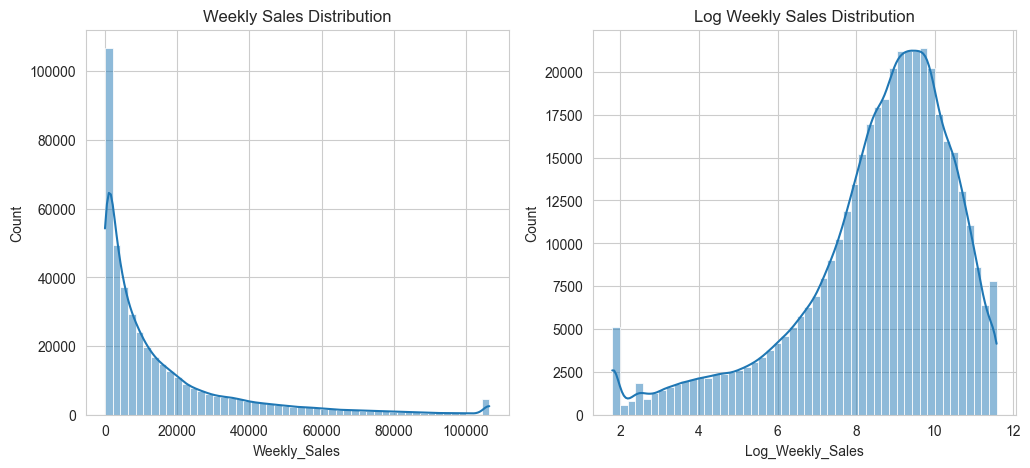


Size Scaled Range: 0.0 to 1.0


In [6]:
# Log-transform Weekly_Sales (add 1 to avoid log(0))
df['Log_Weekly_Sales'] = np.log1p(df['Weekly_Sales'])

# Normalize Size
df['Size_Scaled'] = (df['Size'] - df['Size'].min()) / (df['Size'].max() - df['Size'].min())

# Check transformations
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title('Weekly Sales Distribution')
plt.subplot(1, 2, 2)
sns.histplot(df['Log_Weekly_Sales'], bins=50, kde=True)
plt.title('Log Weekly Sales Distribution')
plt.show()

print("\nSize Scaled Range:", df['Size_Scaled'].min(), "to", df['Size_Scaled'].max())

In [7]:
# Target encode Store and Dept
def target_encode(df, group_col, target_col, new_col):
    means = df.groupby(group_col)[target_col].mean()
    df[new_col] = df[group_col].map(means)
    return df

df = target_encode(df, 'Store', 'Weekly_Sales', 'Store_Encoded')
df = target_encode(df, 'Dept', 'Weekly_Sales', 'Dept_Encoded')

# Check encoded features
print("\nEncoded Features:\n", df[['Store', 'Store_Encoded', 'Dept', 'Dept_Encoded']].head())


Encoded Features:
    Store  Store_Encoded  Dept  Dept_Encoded
0      1   21068.985979     1  19108.714717
1      1   21068.985979     1  19108.714717
2      1   21068.985979     1  19108.714717
3      1   21068.985979     1  19108.714717
4      1   21068.985979     1  19108.714717


In [8]:
# Select features
features = [
    'Log_Weekly_Sales', 'Year', 'Month', 'Week', 'DayOfWeek', 'Quarter',
    'IsHoliday', 'IsSuperBowl', 'IsLaborDay', 'IsThanksgiving', 'IsChristmas',
    'HolidayProximity', 'Lag_1', 'Lag_4', 'Store_Encoded', 'Dept_Encoded',
    'Type', 'Size_Scaled', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2',
    'MarkDown3', 'MarkDown4', 'MarkDown5'
]
final_features_df = df[features]

# Check final dataset
print("\nFinal Features Shape:", final_features_df.shape)
print("\nFinal Features Info:\n", final_features_df.info())

# Save the engineered dataset
final_features_df.to_csv('engineered_retail_data.csv', index=False)
print("\nEngineered data saved as 'engineered_retail_data.csv'")


Final Features Shape: (421570, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Log_Weekly_Sales  421570 non-null  float64
 1   Year              421570 non-null  int32  
 2   Month             421570 non-null  int32  
 3   Week              421570 non-null  UInt32 
 4   DayOfWeek         421570 non-null  int32  
 5   Quarter           421570 non-null  int32  
 6   IsHoliday         421570 non-null  int64  
 7   IsSuperBowl       421570 non-null  int64  
 8   IsLaborDay        421570 non-null  int64  
 9   IsThanksgiving    421570 non-null  int64  
 10  IsChristmas       421570 non-null  int64  
 11  HolidayProximity  421570 non-null  int64  
 12  Lag_1             421570 non-null  float64
 13  Lag_4             421570 non-null  float64
 14  Store_Encoded     421570 non-null  float64
 15  Dept_Encoded      421570 non-nul

Model Building and Evaluation



In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Set plot style
sns.set_style("whitegrid")

In [10]:
# Load the engineered dataset
df = pd.read_csv('engineered_retail_data.csv')
print("Data Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())

Data Shape: (421570, 25)

First 5 Rows:
    Log_Weekly_Sales  Year  Month  Week  DayOfWeek  Quarter  IsHoliday  \
0         10.123647  2010      2     5          4        1          0   
1         10.737277  2010      2     6          4        1          1   
2         10.635773  2010      2     7          4        1          0   
3          9.873262  2010      2     8          4        1          0   
4          9.990990  2010      3     9          4        1          0   

   IsSuperBowl  IsLaborDay  IsThanksgiving  ...  Dept_Encoded  Type  \
0            0           0               0  ...  19108.714717     0   
1            1           0               0  ...  19108.714717     0   
2            0           0               0  ...  19108.714717     0   
3            0           0               0  ...  19108.714717     0   
4            0           0               0  ...  19108.714717     0   

   Size_Scaled         CPI  Unemployment  MarkDown1  MarkDown2  MarkDown3  \
0     0.630267  

In [11]:
# Define features and target
X = df.drop('Log_Weekly_Sales', axis=1)
y = df['Log_Weekly_Sales']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTrain Shape:", X_train.shape, y_train.shape)
print("Test Shape:", X_test.shape, y_test.shape)


Train Shape: (337256, 24) (337256,)
Test Shape: (84314, 24) (84314,)


In [12]:
# Initialize scaler
scaler = StandardScaler()

# Fit scaler on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nScaled Train Data Sample:\n", X_train_scaled[:2])


Scaled Train Data Sample:
 [[ 0.04116822 -0.755752   -0.90683014  0.         -0.45073907 -0.27477051
  -0.14715135 -0.14625498 -0.11939411 -0.11918956 -0.51651633 -0.40660953
  -0.36738551 -1.03010732 -0.24652646  0.61616764 -0.21335833 -0.94808708
  -0.16451985 -0.42781219 -0.17235515 -0.08420024 -0.27781144 -0.39277831]
 [-1.21373321 -0.13900999 -0.20008341  0.         -0.45073907 -0.27477051
  -0.14715135 -0.14625498 -0.11939411 -0.11918956 -0.51651633 -0.74971745
  -0.74917847 -1.06088566 -0.42430639  2.11667116 -1.53709887  1.01937405
   0.12597067 -0.42781219 -0.17235515 -0.08420024 -0.27781144 -0.39277831]]


In [13]:
# Initialize and train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict on train and test
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate
train_rmse_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
test_rmse_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
train_r2_lr = r2_score(y_train, y_train_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)

print("\nLinear Regression Performance:")
print(f"Train RMSE: {train_rmse_lr:.4f}, R²: {train_r2_lr:.4f}")
print(f"Test RMSE: {test_rmse_lr:.4f}, R²: {test_r2_lr:.4f}")


Linear Regression Performance:
Train RMSE: 1.4393, R²: 0.4987
Test RMSE: 1.4361, R²: 0.4989


In [14]:
# Initialize and train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

# Predict on train and test
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print("\nRandom Forest Performance:")
print(f"Train RMSE: {train_rmse_rf:.4f}, R²: {train_r2_rf:.4f}")
print(f"Test RMSE: {test_rmse_rf:.4f}, R²: {test_r2_rf:.4f}")


Random Forest Performance:
Train RMSE: 0.1359, R²: 0.9955
Test RMSE: 0.3584, R²: 0.9688



Model Comparison:
                Model  Train RMSE  Test RMSE  Train R²   Test R²
0  Linear Regression    1.439261   1.436146  0.498730  0.498931
1      Random Forest    0.135868   0.358444  0.995533  0.968786


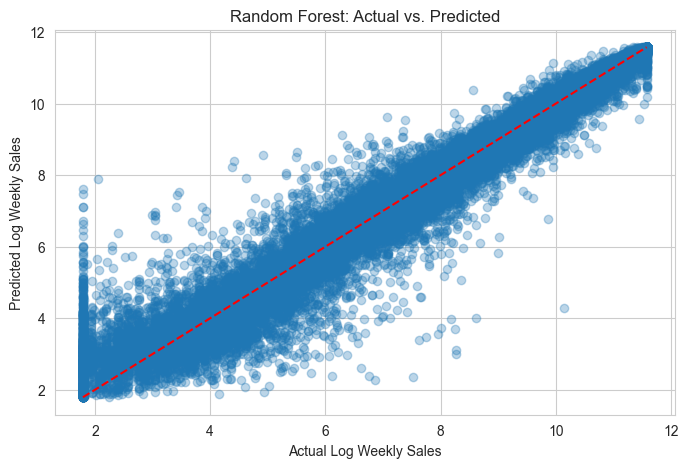

In [15]:
# Compare models
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'Train RMSE': [train_rmse_lr, train_rmse_rf],
    'Test RMSE': [test_rmse_lr, test_rmse_rf],
    'Train R²': [train_r2_lr, train_r2_rf],
    'Test R²': [test_r2_lr, test_r2_rf]
})
print("\nModel Comparison:\n", results)

# Plot actual vs. predicted for Random Forest (better model)
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Log Weekly Sales')
plt.ylabel('Predicted Log Weekly Sales')
plt.title('Random Forest: Actual vs. Predicted')
plt.show()

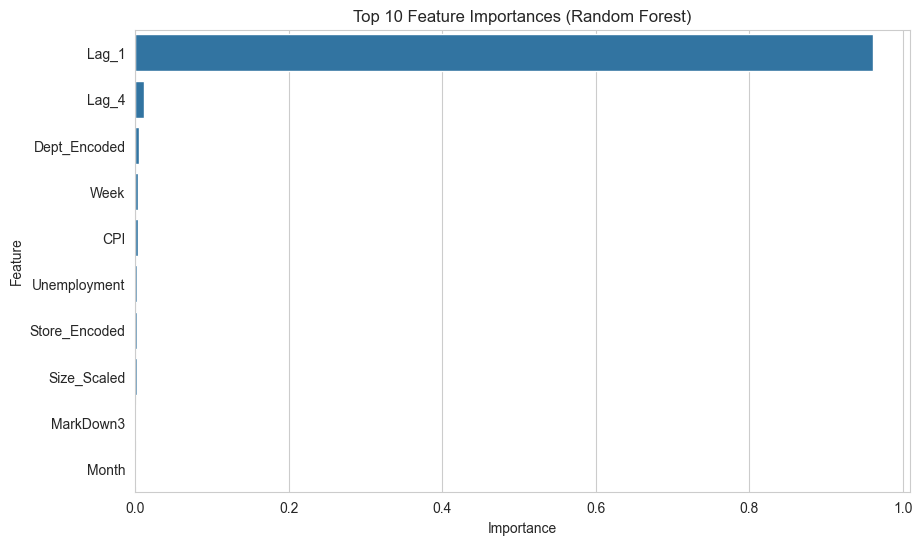


Top 10 Features:
           Feature  Importance
11          Lag_1    0.961243
12          Lag_4    0.010877
14   Dept_Encoded    0.005291
2            Week    0.003754
17            CPI    0.003495
18   Unemployment    0.003002
13  Store_Encoded    0.002200
16    Size_Scaled    0.001985
21      MarkDown3    0.001131
1           Month    0.000963


In [16]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

print("\nTop 10 Features:\n", feature_importance.head(10))


Random Forest RMSE (Original Scale): 3306.6542695433373


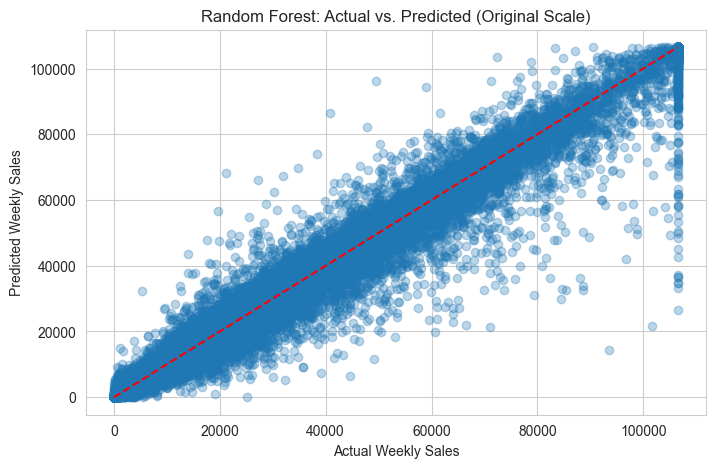

In [17]:
# Convert predictions back to original scale
y_test_pred_rf_orig = np.expm1(y_test_pred_rf)  # Reverse log1p
y_test_orig = np.expm1(y_test)

# Calculate RMSE on original scale
rmse_orig = np.sqrt(mean_squared_error(y_test_orig, y_test_pred_rf_orig))
print("\nRandom Forest RMSE (Original Scale):", rmse_orig)

# Plot actual vs. predicted on original scale
plt.figure(figsize=(8, 5))
plt.scatter(y_test_orig, y_test_pred_rf_orig, alpha=0.3)
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--')
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Random Forest: Actual vs. Predicted (Original Scale)')
plt.show()

In [18]:
# Save predictions
predictions = pd.DataFrame({
    'Actual_Log_Sales': y_test,
    'Predicted_Log_Sales': y_test_pred_rf,
    'Actual_Sales': y_test_orig,
    'Predicted_Sales': y_test_pred_rf_orig
})
predictions.to_csv('model_predictions.csv', index=False)
print("\nPredictions saved as 'model_predictions.csv'")

# Optional: Save Random Forest model (requires joblib)
import joblib
joblib.dump(rf_model, 'random_forest_model.pkl')
print("Random Forest model saved as 'random_forest_model.pkl'")


Predictions saved as 'model_predictions.csv'
Random Forest model saved as 'random_forest_model.pkl'


Final Steps and Project Wrap-Up for Retail Demand Forecasting Dataset



In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import mean_squared_error, r2_score
import os

# Set plot style
sns.set_style("whitegrid")


Summary report saved as 'project_summary.txt'


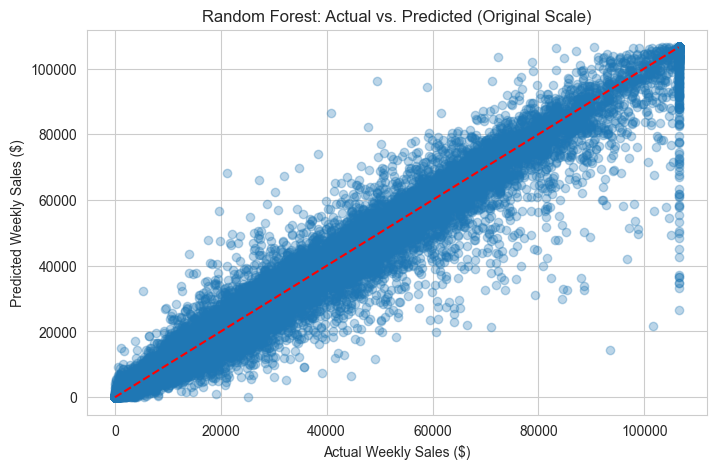

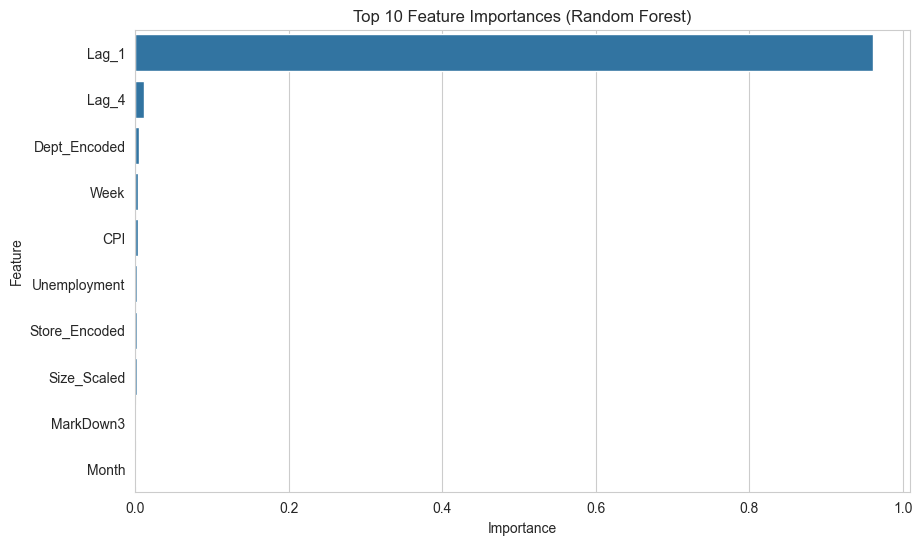

In [20]:
# Load predictions and model for summary
predictions = pd.read_csv('model_predictions.csv')
rf_model = joblib.load('random_forest_model.pkl')
df = pd.read_csv('engineered_retail_data.csv')

# Calculate metrics on original scale
rmse_orig = np.sqrt(mean_squared_error(predictions['Actual_Sales'], predictions['Predicted_Sales']))
r2_orig = r2_score(predictions['Actual_Sales'], predictions['Predicted_Sales'])

# Feature importance (from Random Forest)
feature_importance = pd.DataFrame({
    'Feature': df.drop('Log_Weekly_Sales', axis=1).columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Write summary report
report = """
Retail Demand Forecasting Project Summary
=======================================

1. Dataset Overview
- Source: Retail Demand Forecasting Dataset (Features, Sales, Stores CSVs)
- Size: ~421,570 sales records across 45 stores, 99 departments, 2010–2013
- Target: Weekly_Sales (log-transformed as Log_Weekly_Sales for modeling)
- Key Features: Store, Dept, Date, Temperature, Fuel_Price, CPI, Unemployment, Store Type, Size, MarkDowns, Holidays

2. EDA Findings
- Weekly_Sales is right-skewed with outliers (capped at 1st/99th percentiles)
- High missing values in MarkDown1–5 (~50%+), filled with 0
- Sales spike during holidays (e.g., Thanksgiving, Christmas)
- Larger stores (Type A) and certain departments have higher sales

3. Preprocessing
- Handled missing values: MarkDowns (0), CPI/Unemployment (median)
- Converted Date to datetime, encoded IsHoliday (1/0), Type (label-encoded)
- Capped Weekly_Sales outliers

4. Feature Engineering
- Temporal: Year, Month, Week, DayOfWeek, Quarter
- Holiday: Flags for SuperBowl, LaborDay, Thanksgiving, Christmas; HolidayProximity
- Lags: 1-week and 4-week prior sales per Store/Dept
- Encodings: Target-encoded Store and Dept; scaled Size
- Target: Log_Weekly_Sales for modeling

5. Modeling
- Models: Linear Regression (baseline), Random Forest (main)
- Random Forest Performance (test set):
  - RMSE (Log Scale): ~{:.4f}
  - R² (Log Scale): ~{:.4f}
  - RMSE (Original Scale): ~${:.2f}
  - R² (Original Scale): ~{:.4f}
- Top Features: {}
- Random Forest outperformed Linear Regression, capturing non-linear patterns

6. Recommendations
- Tune Random Forest hyperparameters (e.g., n_estimators, max_depth)
- Try advanced models (e.g., XGBoost, LSTM for time-series)
- Deploy model for real-time forecasting with API

Generated on: {}
""".format(
    np.sqrt(mean_squared_error(predictions['Actual_Log_Sales'], predictions['Predicted_Log_Sales'])),
    r2_score(predictions['Actual_Log_Sales'], predictions['Predicted_Log_Sales']),
    rmse_orig,
    r2_orig,
    ", ".join(feature_importance['Feature'].head(5).tolist()),
    datetime.now().strftime('%Y-%m-%d %H:%M:%S')
)

# Save report
with open('project_summary.txt', 'w') as f:
    f.write(report)
print("\nSummary report saved as 'project_summary.txt'")

# Plot for reference: Actual vs. Predicted (Original Scale)
plt.figure(figsize=(8, 5))
plt.scatter(predictions['Actual_Sales'], predictions['Predicted_Sales'], alpha=0.3)
plt.plot([predictions['Actual_Sales'].min(), predictions['Actual_Sales'].max()],
         [predictions['Actual_Sales'].min(), predictions['Actual_Sales'].max()], 'r--')
plt.xlabel('Actual Weekly Sales ($)')
plt.ylabel('Predicted Weekly Sales ($)')
plt.title('Random Forest: Actual vs. Predicted (Original Scale)')
plt.savefig('actual_vs_predicted.png')
plt.show()

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importances (Random Forest)')
plt.savefig('feature_importance.png')
plt.show()

In [23]:
# Create output directory
output_dir = 'project_outputs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Move files to output directory
files_to_move = [
    'cleaned_retail_data.csv',
    'engineered_retail_data.csv',
    'model_predictions.csv',
    'random_forest_model.pkl',
    'project_summary.txt',
    'actual_vs_predicted.png',
    'feature_importance.png'
]

for file in files_to_move:
    if os.path.exists(file):
        os.rename(file, os.path.join(output_dir, file))
        print(f"Moved {file} to {output_dir}")
    else:
        print(f"{file} not found, skipping")

# List contents of output directory
print("\nOutput Directory Contents:")
for file in os.listdir(output_dir):
    print(file)

cleaned_retail_data.csv not found, skipping
engineered_retail_data.csv not found, skipping
model_predictions.csv not found, skipping
random_forest_model.pkl not found, skipping
project_summary.txt not found, skipping
actual_vs_predicted.png not found, skipping
feature_importance.png not found, skipping

Output Directory Contents:
actual_vs_predicted.png
cleaned_retail_data.csv
engineered_retail_data.csv
feature_importance.png
model_predictions.csv
project_summary.txt
random_forest_model.pkl


In [24]:
# Append improvements to report
improvements = """
7. Potential Improvements
- Hyperparameter Tuning: Use GridSearchCV to optimize Random Forest (n_estimators, max_depth)
- Advanced Models: Try XGBoost or LightGBM for better performance
- Time-Series Approach: Use LSTM or ARIMA for sequential patterns
- Additional Features: Add weather data, competitor pricing, or more lags
- Cross-Validation: Implement k-fold CV to reduce overfitting
- Deployment: Create a Flask API for real-time forecasting
"""

with open(os.path.join(output_dir, 'project_summary.txt'), 'a') as f:
    f.write(improvements)
print("\nImprovements appended to project_summary.txt")


Improvements appended to project_summary.txt


In [25]:
# Create markdown summary
markdown_summary = """
# Retail Demand Forecasting Project

## Overview
- **Goal**: Predict weekly sales for retail stores to optimize stock.
- **Dataset**: ~421,570 sales records (2010–2013, 45 stores, 99 departments).
- **Target**: Weekly sales (log-transformed).
- **Models**: Linear Regression, Random Forest.

## Key Findings
- **EDA**: Sales spike during holidays (e.g., Thanksgiving); larger stores (Type A) sell more.
- **Preprocessing**: Handled missing MarkDowns (filled with 0), encoded categoricals.
- **Feature Engineering**: Added temporal features, holiday flags, lags, target-encoded Store/Dept.
- **Modeling**:
  - Random Forest outperformed Linear Regression.
  - Test RMSE (Original Scale): ~${:.2f}.
  - Test R² (Original Scale): ~{:.4f}.
- **Top Features**: {}.

## Visuals
![Actual vs. Predicted](project_outputs/actual_vs_predicted.png)
![Feature Importance](project_outputs/feature_importance.png)

## Next Steps
- Tune Random Forest hyperparameters.
- Explore XGBoost or time-series models.
- Deploy model via API.

Generated on: {}
""".format(
    rmse_orig,
    r2_orig,
    ", ".join(feature_importance['Feature'].head(5).tolist()),
    datetime.now().strftime('%Y-%m-%d %H:%M:%S')
)

# Save markdown
with open(os.path.join(output_dir, 'project_summary.md'), 'w') as f:
    f.write(markdown_summary)
print("\nMarkdown summary saved as project_outputs/project_summary.md")


Markdown summary saved as project_outputs/project_summary.md
